## 3. Planetary orbits

The gravitational force felt by an object (planet, satellite, star, etc.) of mass $m_1$ at position $r_1$  due to another of mass $m_2$ at $r_2$ is given by

$$\mathbf{F} = - \frac{G m_1 m_2}{|\mathbf{r_1} - \mathbf{r_2}|^3} \mathbf{r}$$

The equations of motion for the first object can then be written:

$$ \frac{\mathrm{d}^2 x_1}{\mathrm{d} t^2} = - \frac{G m_2}{|\mathbf{r_1} - \mathbf{r_2}|^3} x_1 $$
$$ \frac{\mathrm{d}^2 y_1}{\mathrm{d} t^2} = - \frac{G m_2}{|\mathbf{r_1} - \mathbf{r_2}|^3} y_1 $$

In what follows, we will express time in years, distances in AU (astronomical unit $\sim$ Earth-Sun distance), masses in terms of the solar mass ($M_S$) and use $G \approx 4 \pi^2$ to simplify calculations.


Revisit the ODE notebook from Lecture 5 -- here we examined how a 2nd order differential equation (the harmonic oscillator) could be solved using scipy.integration.odeint by splitting it into two coupled first order equations.

Use this as a basis to solve the differential equations above.

### Exercise 1
For the first case, we look at the case of the earth and the sun.

Take $m_1 = 3\times10^{-6}$ and $m_2 =1.0$.

Further assume that the sun remains fixed at the origin -- i.e. $\mathbf{r_2}(t) = \mathbf{0}$.

Use initial conditions $\mathbf{r}(t=0) = (1,0)$ and $\mathbf{v}(t=0) = (0, 2\pi)$.


a) Write the system of 4 coupled differential equations describing the system.

b) Write a function evaluating each of the first derivative terms, and which can be passed to odeint to integration this system of ODEs.

c) Calculate the orbit trajectory by integrating the system of ODEs with a suitable time step.

d) Plot and compare a few orbit with different initial velocities



_answer to a)_

$$ \frac{\mathrm{d} x_1}{\mathrm{d} t} (t)= v_{x1} (t) $$

$$ \frac{\mathrm{d} y_1}{\mathrm{d} t} (t) = v_{y1} (t) $$

$$ \frac{\mathrm{d} v_{x1}}{\mathrm{d} t} (t) = - \frac{G m_2}{|\mathbf{r_1} - \mathbf{r_2}|^3} x_1 (t)  $$

$$ \frac{\mathrm{d} v_{y1}}{\mathrm{d} t} (t) = - \frac{G m_2}{|\mathbf{r_1} - \mathbf{r_2}|^3} y_1 (t) $$


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from matplotlib.animation import FuncAnimation
%matplotlib notebook

In [49]:
# y contains (x1, y1, vx1, vy1)

def dydt(y, t, m2):
    output = np.zeros_like(y)
    output[0]=y[2]
    output[1]=y[3]
    output[2]= - 4*np.pi**2 *m2 * y[0] / (np.sqrt(y[0]**2 + y[1]**2))**3
    output[3]= - 4*np.pi**2 *m2 * y[1] / (np.sqrt(y[0]**2 + y[1]**2))**3
    return output         

(-20.0, 20.0)

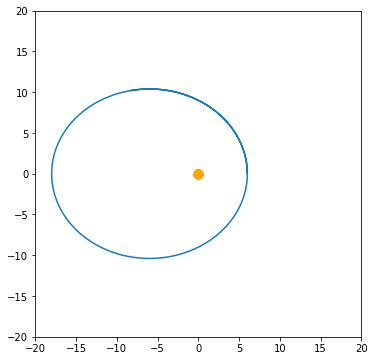

In [81]:
#initial conditions
y0 = np.array((6.0,0, 0*np.pi, 1.0*np.pi))     

#range of times
t=np.linspace(0,50,500)

#run ODE solver for earth-like initial conditions
earthdata = odeint(dydt, y0, t, args=(1.,)).T   

fig, ax = plt.subplots(figsize=(6,6))
ax.set_aspect('equal')
ax.plot(0, 0, 'o', ms=10, color='orange')
ax.plot(earthdata[0], earthdata[1], label="Earth orbit")

s=20.
ax.set_xlim(-s,s)
ax.set_ylim(-s,s)

In [78]:
#other possible starting values of vx
otherstarting = [0.75, 1.0, 2.5, 3.0]

otherdata = []

#generate data for the other cases also
for const in otherstarting:
    y0a = np.array((1, 0, 0*np.pi, const*np.pi)) 
    temp = odeint(dydt, y0a, t, args=(1.0,)).T
    otherdata.append(temp)

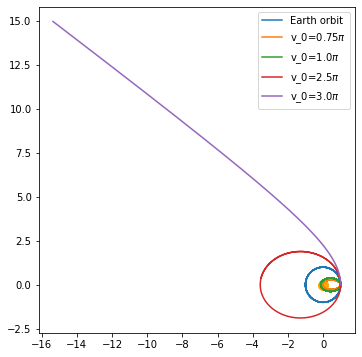

In [73]:
fig, ax = plt.subplots(figsize=(6,6))
ax.set_aspect('equal')
ax.plot(0, 0, 'o', ms=10, color='orange')
ax.plot(earthdata[0], earthdata[1], label="Earth orbit")


for i, const in enumerate(otherstarting):
    ax.plot(otherdata[i][0], otherdata[i][1], label='v_0='+str(const)+r'$\pi$')
ax.legend()
plt.show()

### Homework Q3

Generalise the function above to allow for an arbitrary number of objects, without any assumptions about their relative masses. (Again assume they are in-plane -- only x and y components vary).,

<br>

a) Create a stable binary star system, with the barycentre at the origin.

(_Hint: The distance from the centre of a star to the barycentre is given by  $r_1 = R \frac{m_2}{m_1+m_2}$, where $R$ is the separation between the two stars_)

<br>



b) Place a _much_ smaller planet in orbit around the binary system in a quasi-stable orbit (i.e. the orbit remains almost identical over approx. 10 periods)

(_Hint: choose an initial radius/velocity consistent with a stable orbit around a single large star at the barycenter_)

Create a 2-subplot figure showing i) the orbits of the entire system, and ii) a zoom showing only the binary stars.

<br>


c) Keeping the other parameters fixed, increase the mass of the planet and track the evolution of the orbits.

Show two interesting cases with plots similar to b).



<br>


Bonus exercise: Create an animation to show the time evolution of the orbits for one of the cases in c)

<br>


In [3]:
# Hint use num = number of objects
# Organise y as a 4*num element array arranged (x1, x2, ... y1, y2, .... vx1, vx2,....., vy1, vy2,....)
# organise output similarly
# mass is now a vector with num elements

def dydt_gen(y, t, mass,num):
    
    output=np.zeros(4*num)
    
    for i in range(num):
        output[i]=y[i+2*num]
        output[i+num]=y[i+3*num]
  
        for j in range(num):
            if j!=i:
                output[i+2*num]+= - 4*np.pi**2 *mass[j] * y[i] / (np.sqrt( (y[i]-y[j])**2 + (y[num+i]-y[num+j])**2))**3
                output[i+3*num]+= - 4*np.pi**2 *mass[j] * y[i+num] / (np.sqrt( (y[i]-y[j])**2 + (y[num+i]-y[num+j])**2))**3   
                
    return output         

In [5]:


# Binary stars only 
num=3
masses=[10., 10.,0.0001]

x0s=[ 1., -1, 0.0]
y0s=[ .0, 0., 8.]
vx0=[ 0.0, 0.,9.]
vy0=[ -1., 1.,0.0]



input0 = np.concatenate((x0s, y0s, vx0, vy0))
t=np.linspace(0,50,50000)
bin_data = odeint(dydt_gen, input0, t, args=(masses, num,)).T


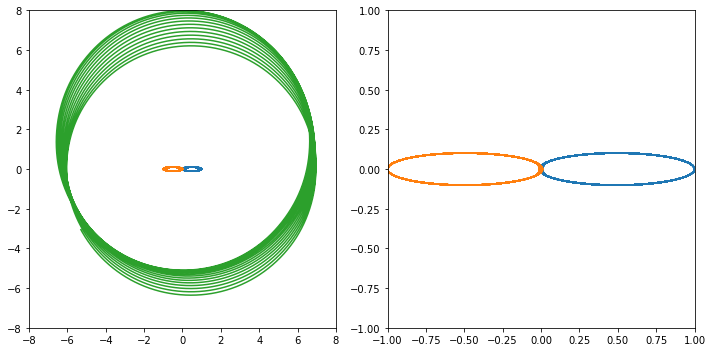

In [7]:
fig= plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 2, 1)


ax.plot(bin_data[0], bin_data[num], label="Earth orbit")
ax.plot(bin_data[1], bin_data[1+num], label="Earth orbit")
ax.plot(bin_data[2], bin_data[2+num], label="Earth orbit")

ax1 = fig.add_subplot(1, 2, 2)

ax1.plot(bin_data[0], bin_data[num], label="Earth orbit")
ax1.plot(bin_data[1], bin_data[1+num], label="Earth orbit")

ax.set_xlim(-8,8)
ax.set_ylim(-8,8)
ax1.set_xlim(-1,1)
ax1.set_ylim(-1,1)
plt.tight_layout()
plt.show()



In [37]:
# Binary stars and planet
num=3
pl_mass=10.    #mass of planet
masses=[1., 1., pl_mass]

pl_dist=6         #starting distance of planet from barycentre of stars
x0s=[-1.0, 1.0, 0.0]
y0s=[0.0, 0.0, pl_dist]

v_init = 1.5*np.pi
vx0=[0., 0., v_init]
vy0=[-1., 1., 0]

input0 = np.concatenate((x0s, y0s, vx0, vy0))

t_tot, t_steps = 450, 12000

t=np.linspace(0,t_tot, t_steps)
binp_data = odeint(dydt_gen, input0, t, args=(masses, num,)).T


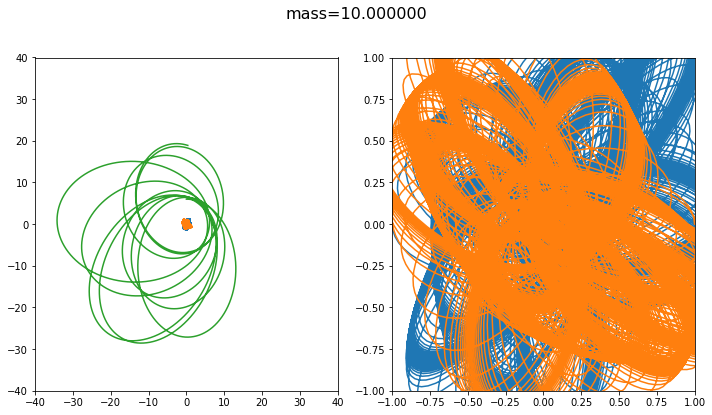

In [38]:
fig= plt.figure(figsize=(10,10))
ax = fig.add_subplot(2, 2, 1)
fig.suptitle('mass=%f'%pl_mass, fontsize=16,y=1.05)

ax.plot(binp_data[0], binp_data[num], label="Earth orbit")
ax.plot(binp_data[1], binp_data[1+num], label="Earth orbit")
ax.plot(binp_data[2], binp_data[2+num], label="Earth orbit")

ax1 = fig.add_subplot(2, 2, 2)

ax1.plot(binp_data[0], binp_data[num], label="Earth orbit")
ax1.plot(binp_data[1], binp_data[1+num], label="Earth orbit")

ax.set_xlim(-40,40)
ax.set_ylim(-40,40)
ax1.set_xlim(-1,1)
ax1.set_ylim(-1,1)
plt.tight_layout()
plt.show()

In [37]:
num=3
pl_mass=10.    #mass of planet
masses=[1., 1., pl_mass]

pl_dist=6         #starting distance of planet from barycentre of stars
x0s=[-1.0, 1.0, 0.0]
y0s=[0.0, 0.0, pl_dist]

v_init = 1.5*np.pi
vx0=[0., 0., v_init]
vy0=[-1., 1., 0]

input0 = np.concatenate((x0s, y0s, vx0, vy0))

t_tot, t_steps = 450, 1201

t=np.linspace(0,t_tot, t_steps)
bin_data = odeint(dydt_gen, input0, t, args=(masses, num,)).T

<IPython.core.display.Javascript object>


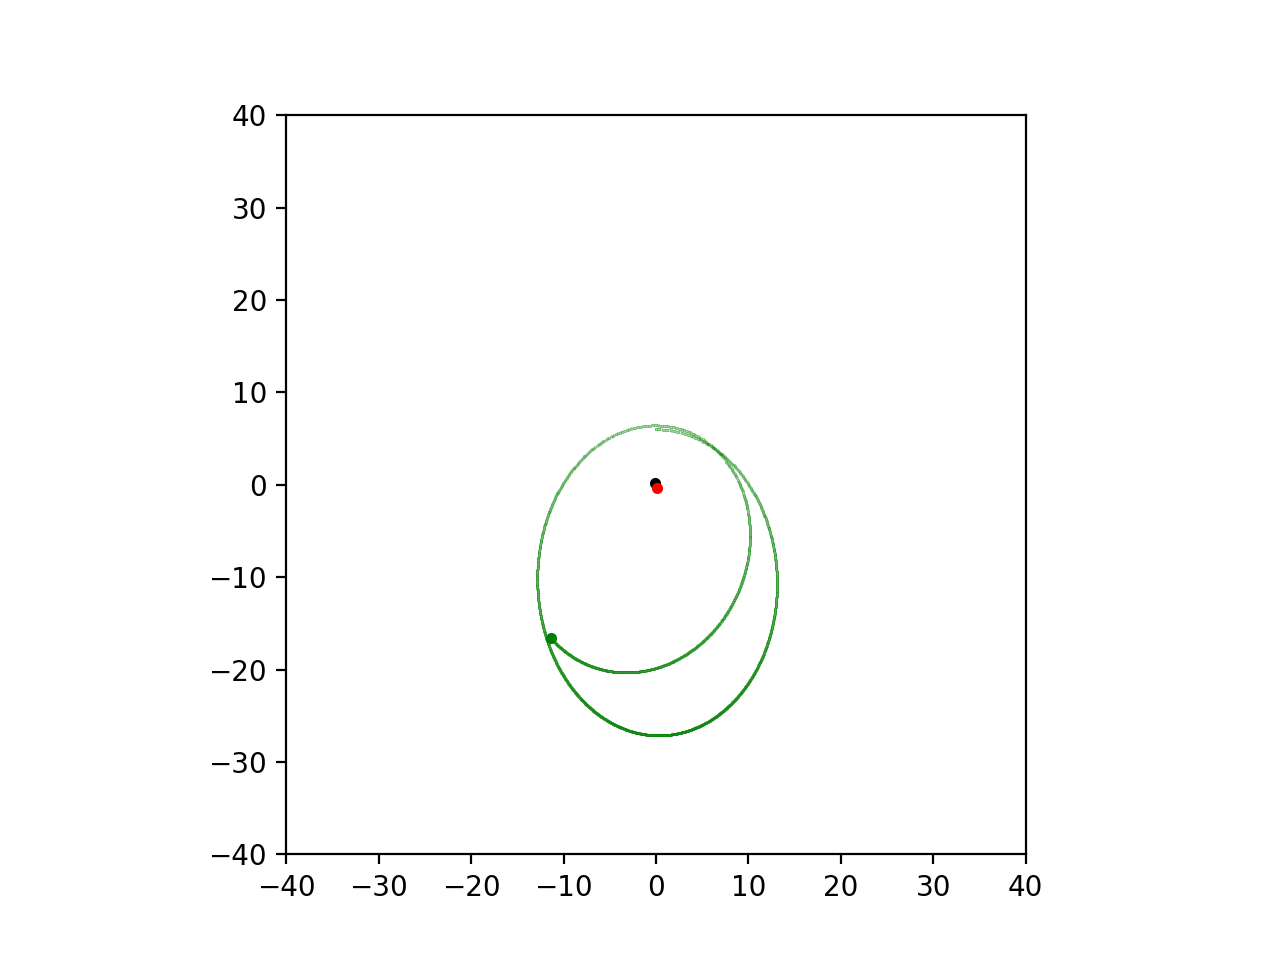

In [61]:


fig = plt.figure()
ax=fig.add_subplot(111)
ax.set_aspect('equal')

posn1, =ax.plot(bin_data[0][0], bin_data[num][0], "ko", ms=3)
posn2, =ax.plot(bin_data[1][0], bin_data[1+num][0], "ro", ms=3)
posn3, =ax.plot(bin_data[2][0], bin_data[2+num][0], "go", ms=3)

def update(step):
    posn1.set_data(bin_data[0][step],bin_data[num][step])
    posn2.set_data(bin_data[1][step],bin_data[1+num][step])
    posn3.set_data(bin_data[2][step],bin_data[2+num][step])

    line1=ax.plot(bin_data[2][step],bin_data[2+num][step],'go',markersize=0.1)


    return posn1,posn2,posn3,    


ani=FuncAnimation(fig, update, 12001, interval=1, repeat=True, blit=True)




ax.set_xlim(-40,40)
ax.set_ylim(-40,40)


plt.show()


